# Mengoptimalkan Proses Data dengan Apache Airflow: Membangun Workflow Otomatis untuk Analisis Data yang Efisien

## Apache Airflow: Mengoptimalkan Workflow Analisis Data

Dalam era di mana data menjadi aset berharga bagi perusahaan, penting bagi sebuah organisasi untuk dapat mengelola, menganalisis, dan memahami data dengan efisien. Namun, seringkali tantangan terbesar bukanlah dalam mengumpulkan data itu sendiri, tetapi dalam mengelola workflow yang kompleks untuk menganalisis dan mendapatkan insight dari data tersebut. Di sinilah Apache Airflow menjadi tools yang sangat diperlukan.

### Apa itu Apache Airflow?
Apache Airflow adalah platform open-source yang dirancang untuk membuat, menjadwalkan, dan mengelola alur kerja (workflow) data secara otomatis. Dikembangkan pertama kali oleh tim di Airbnb pada tahun 2014, Apache Airflow sejak itu telah menjadi salah satu tools yang paling populer dalam ekosistem analisis data dan pemrosesan Big Data.

Dengan Apache Airflow, pengguna dapat:

1. **Mendefinisikan workflow yang kompleks**: Pengguna dapat mendefinisikan workflow mereka secara terstruktur dengan task-task yang dieksekusi secara berurutan atau paralel.
2. **Mengatur jadwal eksekusi**: Apache Airflow memungkinkan pengguna untuk menjadwalkan workflow mereka sesuai dengan kebutuhan, baik itu secara satu kali (one-time) maupun berulang (recurring), seperti harian, mingguan, atau bulanan.
3. **Memantau dan mengelola workflow**: Platform ini dilengkapi dengan user interface berbasis web yang memungkinkan pengguna untuk memantau dan mengelola workflow dengan mudah.
4. **Skalabilitas dan ketangguhan**: Apache Airflow dirancang untuk menangani workflow yang kompleks dan berat.

### Manfaat Apache Airflow dalam Analisis Data
Penggunaan Apache Airflow dalam analisis data membawa sejumlah manfaat yang signifikan, termasuk:

1. **Efisiensi Operasional**: Dengan otomatisasi workflow, waktu dan upaya yang dibutuhkan untuk menjalankan task-task rutin dapat dikurangi secara signifikan, meningkatkan efisiensi operasional secara keseluruhan.
2. **Konsistensi**: Apache Airflow memastikan bahwa workflow dieksekusi dengan konsisten sesuai dengan definisi yang telah ditentukan, mengurangi risiko kesalahan manusia dan meningkatkan akurasi hasil.
3. **Skalabilitas**: Dengan kemampuan untuk menangani workflow yang kompleks dan skala yang besar, Apache Airflow memungkinkan organisasi untuk berkembang seiring dengan pertumbuhan data mereka tanpa mengorbankan kinerja.
4. **Fleksibilitas**: Platform ini memungkinkan pengguna untuk dengan mudah menyesuaikan workflow sesuai dengan kebutuhan bisnis yang berubah, memungkinkan adaptasi cepat terhadap perubahan lingkungan.

### Bagaimana Apache Airflow Bekerja?
Dalam Apache Airflow, pembuatan workflow tugas didefinisikan sebagai DAG (Directed Acyclic Graph). Secara sederhana, DAG adalah kumpulan dari task yang akan dijalankan. Dengan menggunakan DAG, Anda bisa mengatur bagaimana urutan dan dependency tiap task.

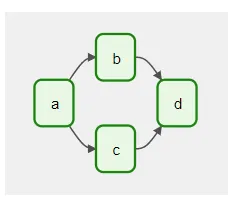

Sumber: https://airflow.apache.org/docs/apache-airflow/stable/core-concepts/dags.html

Berikut contoh DAG sederhana yang memiliki 4 task — a, b, c, d — serta menunjukkan urutan dan dependency dari setiap task:

- Task A akan terlebih dahulu dijalankan.
- Task B dan task C akan dijalankan apabila task A selesai dijalankan.
- Task D akan dijalankan apabila kedua task B dan C selesai dijalankan.

Selain DAG, Apache Airflow memiliki komponen lain yang dapat mendukung pembuatan workflow otomatis.

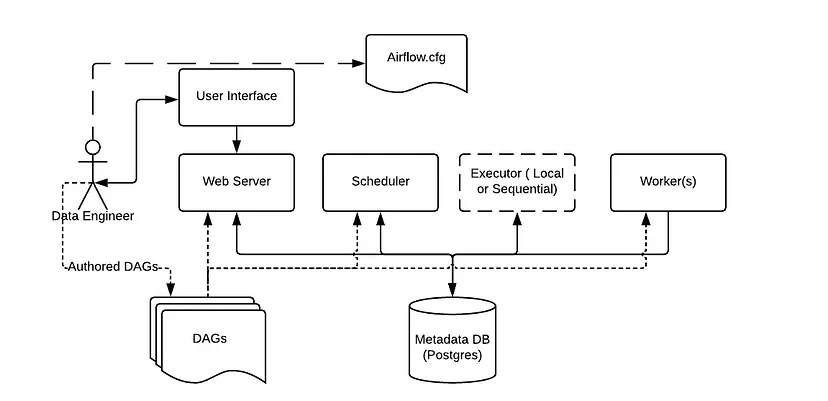

Sumber: https://airflow.apache.org/docs/apache-airflow/2.0.1/concepts.html#

### Proses Konfigurasi dan Instalasi Apache Airflow
Proses konfigurasi Apache Airflow dan pembuatan data pipeline sering kali menjadi tanggung jawab seorang data engineer. Proses konfigurasi Airflow dapat dilakukan melalui Airflow.cfg, dan data pipeline (DAG) dapat diatur melalui Airflow User Interface. Selain itu, sebuah DAG memiliki keterkaitan langsung dengan komponen-komponen seperti Scheduler, Worker, Web Server, dan Metadata.

### Instalasi Apache Airflow
Instalasi Apache Airflow dapat dilakukan menggunakan dua cara, yaitu menggunakan PyPI atau menggunakan docker image. Untuk pengguna OS Windows, secara personal saya rekomendasikan untuk melakukan instalasi melalui docker image untuk menghemat memori Anda. Sedangkan pengguna OS ubuntu atau Linux Anda dapat melakukan instalasi menggunakan PyPI.

Hal pertama yang perlu dilakukan adalah melakukan instalasi docker dan docker compose. Anda bisa mengikuti instalasi pada [Official Documentation Docker](https://docs.docker.com/get-docker/). Untuk melakukan pengecekan apakah docker sudah terinstal dengan baik Anda dapat menjalankan perintah berikut pada terminal.

```
C:\Users\user>docker compose version
Docker Compose version v2.24.3-desktop.1
```

Setelah memastikan docker dan docker compose sudah terinstal anda dapat mengarahkan terminal ke folder tempat anda akan meletakkan DAG Airflow.

Selanjutnya Anda perlu mendownload file docker compose untuk melakukan setup airflow.

```
curl -LfO https://airflow.apache.org/docs/apache-airflow/2.8.1/docker-compose.yaml
```

Command tersebut akan mendownload sebuah file docker-compose.yaml. Pada folder tersebut Anda dapat melakukan konfigurasi Airflow secara local. Salah satu konfigurasi yang perlu Anda lakukan adalah menentukan folder tempat penyimpanan DAGs, log, konfigurasi, dan plugin yang akan digunakan.

```
 volumes:
    - ${AIRFLOW_PROJ_DIR:-.}/dags:/opt/airflow/dags
    - ${AIRFLOW_PROJ_DIR:-.}/logs:/opt/airflow/logs
    - ${AIRFLOW_PROJ_DIR:-.}/config:/opt/airflow/config
    - ${AIRFLOW_PROJ_DIR:-.}/plugins:/opt/airflow/plugins
```

Selanjutnya adalah Anda perlu membuat folder dags, logs, config dan plugins. Anda dapat membuat folder tersebut secara manual atau melalui terminal menggunakan command berikut.

```
mkdir dags logs config plugins
```

Secara default Airflow User ID Anda adalah 50000. Namun, Anda dapat meletakkan informasi Airflow User ID pada sebuah file .env yang Anda buat sendiri. Anda dapat membuat secara manual maupun menggunakan command berikut.

```
echo AIRFLOW_UID=50000 > .env
```
Hal yang selanjutnya Anda lakukan adalah menginisialisasi database Airflow yang digunakan. Untuk melakukan hal ini, Anda hanya perlu menggunakan command berikut.

```
docker compose up airflow-init
```

Command tersebut akan membuat sebuah user baru dengan username airflow dan password airflow yang dapat Anda gunakan untuk login pada Airflow web server.

Proses instalasi Airflow sudah berhasil. Selanjutnya Anda dapat menjalankan seluruh komponen Apache Airflow menggunakan command berikut.

```
docker compose up
```

Output dari command tersebut adalah sebagai berikut
```
[+] Running 7/8
 - Network airflow-docker_default                Created  56.0s 
 ✔ Container airflow-docker-redis-1              Healthy  16.7s 
 ✔ Container airflow-docker-postgres-1           Healthy  16.7s 
 ✔ Container airflow-docker-airflow-init-1       Exited   17.3s 
 ✔ Container airflow-docker-airflow-triggerer-1  Started  54.8s 
 ✔ Container airflow-docker-airflow-scheduler-1  Started  55.0s 
 ✔ Container airflow-docker-airflow-worker-1     Started  54.5s 
 ✔ Container airflow-docker-airflow-webserver-1  Started  
```

Anda dapat menjalankan Airflow pada background dengan menambahkan -d pada command sebelumnya.

Selanjutnya Anda dapat mengakses Airflow web server melalui localhost:8080. Berikut adalah tampilan Airflow Web Server.

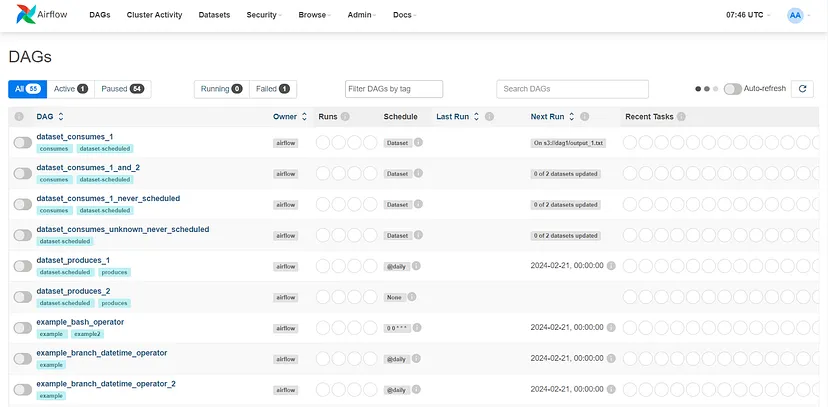
Airflow webserver


Pada Airflow web server ini Anda dapat melakukan monitoring dan manajemen DAG. Anda akan mendapatkan beberapa contoh DAG yang secara default akan muncul. Anda dapat melihat informasi tentang DAG apa saja yang sedang aktif, berjalan, dan gagal dijalankan. Apabila Anda klik pada salah satu DAG, Anda akan mendapatkan informasi mengenai task apa saja dan bagaimana dependency antar task pada DAG tersebut. Berikut contoh salah satu DAG.

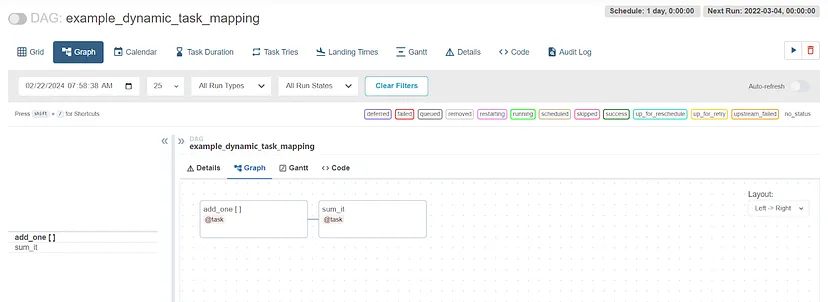
Tampilan DAG

Apabila Anda ingin melihat apa yang dijalankan pada setiap task, Anda dapat klik pada salah satu task dan melihat informasi tentang code dan log eksekusi tiap task. Selamat! Anda telah berhasil melakukan instalasi Apache Airflow pada komputer local Anda.

### Penutup
Dalam dunia yang didorong oleh data, Apache Airflow telah menjadi alat yang tak tergantikan dalam membangun workflow otomatis untuk analisis data yang efisien. Dengan kemampuannya untuk mendefinisikan, menjadwalkan, dan mengelola workflow secara efisien, Apache Airflow membantu organisasi mengoptimalkan proses mereka dan mendapatkan insight yang berharga dari data mereka. Dengan terus berkembangnya ekosistem open-source dan kontribusi dari komunitas developer, Apache Airflow tetap menjadi salah satu pilihan utama bagi organisasi yang mencari solusi untuk manajemen workflow data yang handal dan scalable.